In [1]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import time
from imutils import face_utils

In [6]:
# detector = dlib.get_frontal_face_detector()
detector = dlib.simple_object_detector("../mouth_object_detector.dat")
predictor = dlib.shape_predictor("../mouth_shape_detector.dat")

Inference Time: 0.08140449999999078


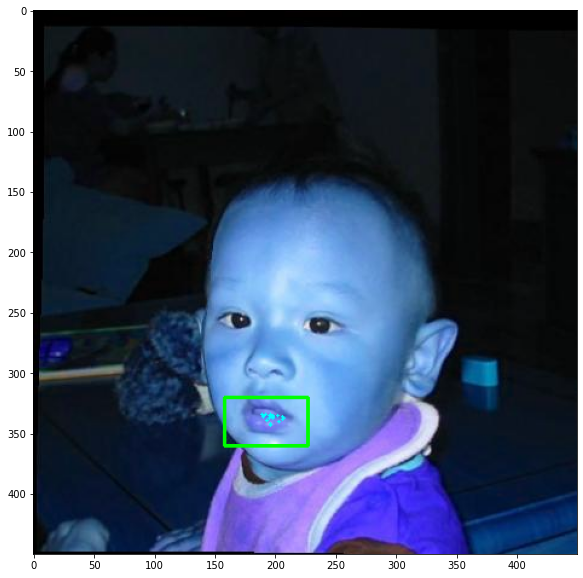

In [11]:
image = cv2.imread("../data/300W_LP/AFW/AFW_1204062305_1_2.jpg")
# Convert the image color to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

start = time.perf_counter()
# Detect the face
rects = detector(gray, 1)
end = time.perf_counter()

# Detect landmarks for each face
for rect in rects:
    (x_rect, y_rect, w_rect, h_rect) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x_rect, y_rect), (x_rect + w_rect, y_rect + h_rect), (0, 255, 0), 2)
    # Get the landmark points
    shape = predictor(gray, dlib.rectangle(left=x_rect, top=y_rect, right=x_rect+w_rect, bottom=y_rect+h_rect)) # rect) #
    # Convert it to the NumPy Array
    shape_np = np.zeros((20, 2), dtype="int")
    for i in range(0, 20):
        shape_np[i] = (shape.part(i).x, shape.part(i).y)
    # shape = shape_np
    # end = time.perf_counter()

    # Display the landmarks
    for i, (x, y) in enumerate(shape_np):
        # Draw the circle to mark the keypoint
        cv2.circle(image, (x, y), 1, (0, 255, 255), -1)

# Display the image
print(f"Inference Time: {end-start}")
plt.figure(figsize=(20,10))
plt.imshow(image)

In [5]:
rect

rectangle(158,320,227,360)

In [22]:
dlib.rectangle(left=x_rect, top=y_rect, right=x_rect+w_rect, bottom=y_rect+h_rect)

rectangle(158,320,227,360)

In [4]:
x_min, x_max, y_min, y_max = shape_np[...,0].min(), shape_np[...,0].max(), shape_np[...,1].min(), shape_np[...,1].max()

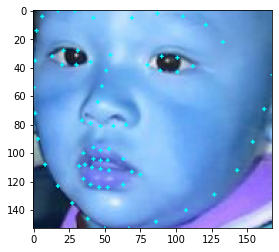

In [5]:
plt.imshow(image[y_min:y_max, x_min:x_max])

In [6]:
k = 0.20
x_min -= 2 * k * abs(x_max - x_min)
y_min -= 2 * k * abs(y_max - y_min)
x_max += 2 * k * abs(x_max - x_min)
y_max += 0.6 * k * abs(y_max - y_min)

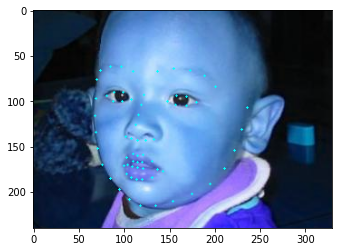

In [7]:
plt.imshow(image[int(y_min):int(y_max), int(x_min):int(x_max)])